# Installing packages

In [95]:
!pip install pandas
!pip install numpy
!pip install beautifulsoup4 
!pip install requests
!pip install selenium
!pip install urllib3

# selenium is installed make it dynamic

In [96]:
!pip install selenium 

In [97]:
#Importing packages
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup, NavigableString, Tag
from selenium import webdriver
from datetime import datetime,date
import matplotlib.pyplot as plt

# Data Gathering/Data Extracting
- Create a new instance of chrome.
- This will help our program open an url in google chrome & dynamically Scrap our data (The reason we are using selenium)

In [98]:
driver = webdriver.Chrome(executable_path = r"C:\Users\Abhijith N S\Desktop\Untitled Folder\covid-19\chromedriver_win32\chromedriver.exe")
url = 'https://www.mohfw.gov.in/'
driver.get(url) #using selenium for webpage table content because it is dynamically loads after page loads because of javascript(DOM)
webContent = driver.page_source
PySoup = BeautifulSoup(webContent,'lxml')
driver.quit()

# Getting Date on which we are Scraping The COVID-19 Data

- Date

In [99]:
div_data = PySoup.find_all('div',{'class' : "data-table table-responsive"})
get_date = div_data[0].h5.span.text.split(":")[1].split(",")[0]
format = ' %d %B %Y' # The format we want to respresent our date 
datetime_obj = datetime.strptime(get_date, format).date()
print(type(datetime_obj))

<class 'datetime.date'>


- Scraping Heading

In [100]:
#Scraping headings ==>
get_head = PySoup.find_all('thead')[0].find('tr',{'class' : "row1"})
headings = [th.get_text().strip() for th in get_head.find_all("th")]
headings.insert(3,'Change Active Case Since Yesterday')
headings.insert(5,'Change Cured Case Since Yesterday')
headings.insert(7,'Change Death Case Since Yesterday')

- Scraping Table Data

In [101]:
get_tbody = PySoup.find_all('tbody')[0]      #find_all returns list of tags that contains data
#Extracting Table Data into "mytabledata" [] ==>
mytabledata = []
list_of_tr_rows = get_tbody.find_all("tr")
for tr_row in list_of_tr_rows:
    if isinstance(tr_row,NavigableString):
        continue
    if isinstance(tr_row, Tag):
        statedata_singlerow = [-int(td.get_text().strip()) \
                               if (td.span != None) and (td.span.get('class',[0])[0] == "down") \
                               else td.get_text().strip() \
                               for td in tr_row.find_all("td")
                              ]
        data = dict(zip( headings,(statedata_singlerow) ))  
        if 'Active Cases*' in data:
            mytabledata.append(data)

- Coverting "mytabledata Into" our DataFrame & doing Data Cleaning

In [102]:
state_data = pd.DataFrame(mytabledata, columns=headings)
new_cols = ["Sr.No","States/UT","Active Cases","Active Cases Since Yesterday",\
            "Recovered","Recovered Cases Since Yesterday","Deceased","Deceased Cases Since Yesterday"]
state_data.columns = new_cols
state_data = state_data.set_index('Sr.No')
state_data.loc['Total#']['Deceased'] = state_data.loc['Total#']['Recovered']
state_data.loc['Total#']['Recovered'] = state_data.loc['Total#']['Active Cases']
state_data.loc['Total#']['Active Cases'] = state_data.loc['Total#']['States/UT']
print(str(datetime_obj.strftime("%d-%m-%Y")))
print(type(str(datetime_obj.strftime("%d-%m-%Y"))))
state_data['Date'] = str(datetime_obj) #.strftime("%d-%m-%Y"))
print(type(state_data['Date']))
# state_data['Date'] = datetime.now().date()

# state_data['Date'] = pd.to_datetime(state_data['Date'])
# df_new = state_data.rename(columns={'A': 'a'}, index={'ONE': 'one'})   #for renaming columns
state_data.rename(index={'Total#': 'Total'},inplace=True)

07-01-2021
<class 'str'>
<class 'pandas.core.series.Series'>


- Data cleaning

In [103]:
state_data.replace(['',np.nan], 0,inplace=True)
cols_to_include =[i for i in state_data.columns if i not in ['States/UT','Date']]
state_data[cols_to_include] = state_data[cols_to_include].astype('int')
state_data['States/UT'] = state_data['States/UT'].astype('str')
state_data['Deceased Cases Since Yesterday'] = state_data['Deceased Cases Since Yesterday'].abs()
# state_data.loc['35']['Deceased Cases Since Yesterday'] = sum(state_data['Deceased Cases Since Yesterday'])
state_data.iat[35, 6] = sum(state_data['Deceased Cases Since Yesterday'])
# state_data.at[34,'Deceased Cases Since Yesterday'] = sum(state_data['Deceased Cases Since Yesterday'])
# print(state_data['Deceased Cases Since Yesterday'][0])# = sum(state_data['Deceased Cases Since Yesterday'])

state_data

,States/UT,Active Cases,Active Cases Since Yesterday,Recovered,Recovered Cases Since Yesterday,Deceased,Deceased Cases Since Yesterday,Date
Sr.No,,,,,,,,
1,Andaman and Nicobar Islands,28,-3,4859,3,62,0,2021-01-07
2,Andhra Pradesh,2896,-142,873855,428,7125,3,2021-01-07
3,Arunachal Pradesh,88,9,16609,0,56,0,2021-01-07
4,Assam,3039,-36,212328,79,1057,0,2021-01-07
5,Bihar,4184,-167,248410,481,1420,5,2021-01-07
6,Chandigarh,256,16,19525,61,323,1,2021-01-07
7,Chhattisgarh,9109,-2,273030,1042,3447,10,2021-01-07
8,Dadra and Nagar Haveli and Daman and Diu,5,-2,3372,2,2,0,2021-01-07
9,Delhi,4481,-81,613246,719,10625,16,2021-01-07


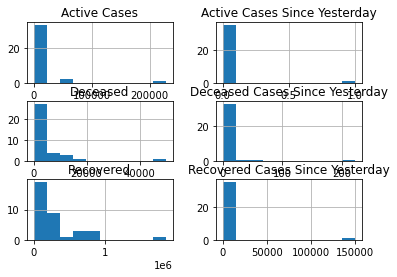

In [104]:
state_data.hist()
plt.show()

# Putting data into a map

In [11]:
import json

In [12]:
indian_states = json.load(open(r"states_india.geojson"))

In [13]:
state_id_map = {}
for feature in indian_states['features']:
    feature['id'] = feature['properties']['state_code']
    state_id_map[feature['properties']['st_nm']] = feature['id']

In [14]:
state_id_map

{'Telangana': 0,
 'Andaman & Nicobar Island': 35,
 'Andhra Pradesh': 28,
 'Arunanchal Pradesh': 12,
 'Assam': 18,
 'Bihar': 10,
 'Chhattisgarh': 22,
 'Daman & Diu': 25,
 'Goa': 30,
 'Gujarat': 24,
 'Haryana': 6,
 'Himachal Pradesh': 2,
 'Jammu & Kashmir': 1,
 'Jharkhand': 20,
 'Karnataka': 29,
 'Kerala': 32,
 'Lakshadweep': 31,
 'Madhya Pradesh': 23,
 'Maharashtra': 27,
 'Manipur': 14,
 'Chandigarh': 4,
 'Puducherry': 34,
 'Punjab': 3,
 'Rajasthan': 8,
 'Sikkim': 11,
 'Tamil Nadu': 33,
 'Tripura': 16,
 'Uttar Pradesh': 9,
 'Uttarakhand': 5,
 'West Bengal': 19,
 'Odisha': 21,
 'Dadara & Nagar Havelli': 26,
 'Meghalaya': 17,
 'Mizoram': 15,
 'Nagaland': 13,
 'NCT of Delhi': 7}

In [15]:
indian_states['features'][1]['properties']

{'cartodb_id': 2, 'state_code': 35, 'st_nm': 'Andaman & Nicobar Island'}

In [16]:
indian_states['features'][0].keys()

dict_keys(['type', 'geometry', 'properties', 'id'])

In [17]:
state_data.head()

,States/UT,Active Cases,Active Cases Since Yesterday,Recovered,Recovered Cases Since Yesterday,Deceased,Deceased Cases Since Yesterday,Date
Sr.No,,,,,,,,
1,Andaman and Nicobar Islands,31,-7,4856,8,62,0,2021-01-06
2,Andhra Pradesh,3038,95,873427,278,7122,4,2021-01-06
3,Arunachal Pradesh,79,-8,16609,11,56,0,2021-01-06
4,Assam,3075,-12,212249,50,1057,3,2021-01-06
5,Bihar,4351,-29,247929,445,1415,7,2021-01-06


###### state_data['id'] = state_data['States/UT'].apply(lambda x: state_id_map[x])

#### getting the data according to the date and saving the file name accordingly

In [19]:
from datetime import datetime
def custom_strftime(format,date_obj):
    suffix = (lambda X:'th' if 11<=X<=13 else {1:'st',2:'nd',3:'rd'}.get(X%10, 'th'))(int(date_obj.day))
    return date_obj.strftime(format).replace('{S}', str(date_obj.day) + str(suffix))
# datetime_obj  = datetime.now()
file_name = "COVID19_{}".format(custom_strftime('{S}%b',datetime_obj))

state_data.to_excel(r'C:\Users\Abhijith N S\Desktop\Untitled Folder\covid-19\{}.xlsx'.format(file_name),sheet_name = 'COVID19 State Data')
state_data.to_csv(r'C:\Users\Abhijith N S\Desktop\Untitled Folder\covid-19\{}.csv'.format(file_name))
state_data

,States/UT,Active Cases,Active Cases Since Yesterday,Recovered,Recovered Cases Since Yesterday,Deceased,Deceased Cases Since Yesterday,Date
Sr.No,,,,,,,,
1,Andaman and Nicobar Islands,31,-7,4856,8,62,0,2021-01-06
2,Andhra Pradesh,3038,95,873427,278,7122,4,2021-01-06
3,Arunachal Pradesh,79,-8,16609,11,56,0,2021-01-06
4,Assam,3075,-12,212249,50,1057,3,2021-01-06
5,Bihar,4351,-29,247929,445,1415,7,2021-01-06
6,Chandigarh,240,-27,19464,116,322,1,2021-01-06
7,Chhattisgarh,9111,-655,271988,1651,3437,25,2021-01-06
8,Dadra and Nagar Haveli and Daman and Diu,7,-1,3370,1,2,0,2021-01-06
9,Delhi,4562,-127,612527,557,10609,12,2021-01-06


##### After editing the csv file according to the requirment pulled it back into dataframe tried puting it into the Map

In [80]:
C_19_6th_jan = pd.read_csv(r'C:\Users\Abhijith N S\Desktop\Untitled Folder\covid-19\6th_jan_2021\COVID19_6thJan.csv')

In [81]:
C_19_6th_jan

,Sr.No,States/UT,Active Cases,Active Cases Since Yesterday,Recovered,Recovered Cases Since Yesterday,Deceased,Deceased Cases Since Yesterday,Date
0,1,Andaman & Nicobar Island,31,-7,4856,8,62,0,2021-01-06
1,2,Andhra Pradesh,3038,95,873427,278,7122,4,2021-01-06
2,3,Arunanchal Pradesh,79,-8,16609,11,56,0,2021-01-06
3,4,Assam,3075,-12,212249,50,1057,3,2021-01-06
4,5,Bihar,4351,-29,247929,445,1415,7,2021-01-06
5,6,Chandigarh,240,-27,19464,116,322,1,2021-01-06
6,7,Chhattisgarh,9111,-655,271988,1651,3437,25,2021-01-06
7,8,Dadara & Nagar Havelli,7,-1,3370,1,2,0,2021-01-06
8,9,Daman & Diu,7,-1,3370,1,2,0,2021-01-06
9,10,NCT of Delhi,4562,-127,612527,557,10609,12,2021-01-06


#### I have Droped the ROW 36 which not required for the plot

In [82]:
total = C_19_6th_jan[C_19_6th_jan['Sr.No'] == 'Total'].index

In [83]:
C_19_6th_jan.drop(total, inplace = True)

In [84]:
C_19_6th_jan

,Sr.No,States/UT,Active Cases,Active Cases Since Yesterday,Recovered,Recovered Cases Since Yesterday,Deceased,Deceased Cases Since Yesterday,Date
0,1,Andaman & Nicobar Island,31,-7,4856,8,62,0,2021-01-06
1,2,Andhra Pradesh,3038,95,873427,278,7122,4,2021-01-06
2,3,Arunanchal Pradesh,79,-8,16609,11,56,0,2021-01-06
3,4,Assam,3075,-12,212249,50,1057,3,2021-01-06
4,5,Bihar,4351,-29,247929,445,1415,7,2021-01-06
5,6,Chandigarh,240,-27,19464,116,322,1,2021-01-06
6,7,Chhattisgarh,9111,-655,271988,1651,3437,25,2021-01-06
7,8,Dadara & Nagar Havelli,7,-1,3370,1,2,0,2021-01-06
8,9,Daman & Diu,7,-1,3370,1,2,0,2021-01-06
9,10,NCT of Delhi,4562,-127,612527,557,10609,12,2021-01-06


#### combine state_id_map and states/ut in the dataframe

In [85]:
C_19_6th_jan['id'] = C_19_6th_jan['States/UT'].apply(lambda x: state_id_map[x])

- installed plotly

In [86]:
!pip install plotly

- make it look better I have converted log10 of the value using numpy

In [87]:
import numpy as np

In [88]:
C_19_6th_jan['Deceased_scale'] = np.log10(C_19_6th_jan['Deceased'])

In [89]:
import plotly.express as px

In [90]:
import plotly.io as pio
pio.renderers.default = 'browser'

### this will plot into choropleth

In [91]:
fig=px.choropleth(C_19_6th_jan, 
                  locations='id', 
                  geojson=indian_states, 
                  color='Deceased_scale', 
                  scope='asia',
                  hover_name='States/UT',
                  hover_data=['Active Cases','Recovered'],
                  # color_continuous_scale=px.colors.diverging.BrBG,
                  # color_continuous_midpoint=0
                 )
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

- this is the other way to plot

In [105]:
fig = px.choropleth_mapbox(C_19_6th_jan,
                     locations='id',
                     geojson=indian_states,
                     color='Deceased_scale',
                     hover_name='States/UT',
                     hover_data=['Active Cases','Recovered'],
                     mapbox_style="carto-positron",
                     center={'lat':24, 'lon':78},
                     zoom=4,
                     opacity=0.5      
                    )
fig.show()

- this current activity like currently it is increasing or decreasing

In [106]:
fig = px.choropleth_mapbox(C_19_6th_jan,
                     locations='id',
                     geojson=indian_states,
                     color='Active Cases Since Yesterday',
                     hover_name='States/UT',
                     hover_data=['Recovered Cases Since Yesterday',
                                 'Deceased Cases Since Yesterday'],
                        color_continuous_scale=px.colors.diverging.BrBG_r,
                        color_continuous_midpoint=0,
                     mapbox_style="carto-positron",
                     center={'lat':20.5937, 'lon':78.9628},
                     zoom=2.75,
                     opacity=0.5,
                    )
fig.show()

## references

- https://en.wikipedia.org/wiki/List_of_states_and_union_territories_of_India_by_population

- https://un-mapped.carto.com/tables/states_india/public/map

- https://plotly.com/python/choropleth-maps/

- https://plotly.com/python/colorscales/

- https://www.mapbox.com/

- https://plotly.com/python/mapbox-county-choropleth/

- https://plotly.com/python/mapbox-layers/